# Explore here

In [29]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


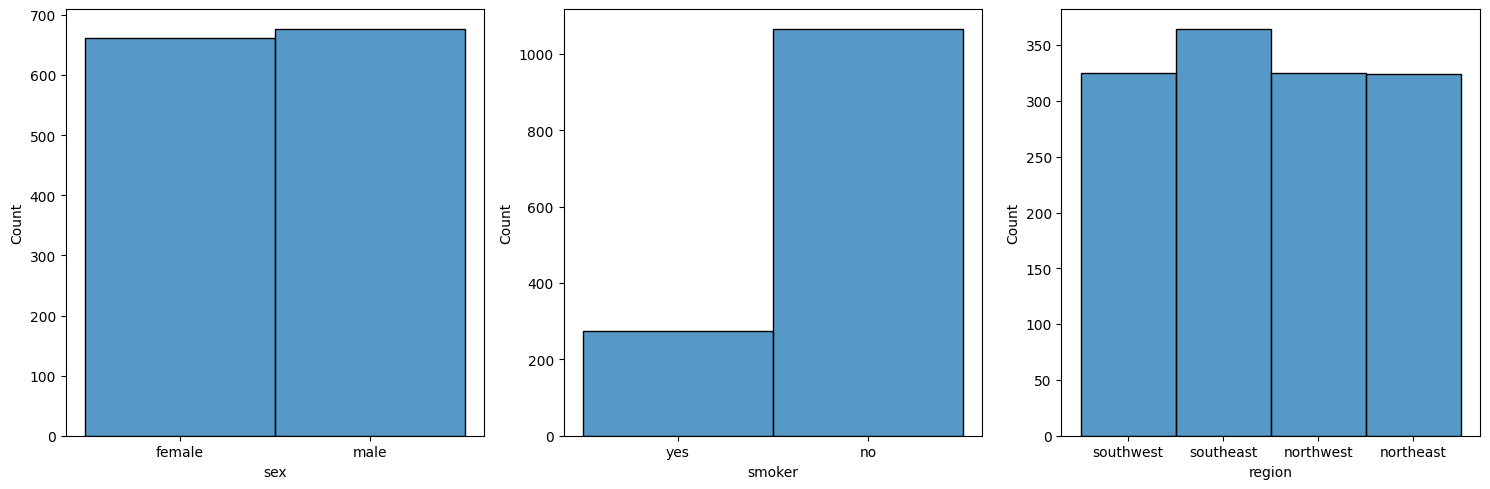

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(ax=axis[0], data=df, x='sex')#.set(xticklabels=[])  esto se pone si no puedo ver el gráfico bien por tantas columnas
sns.histplot(ax=axis[1], data=df, x='smoker')
sns.histplot(ax=axis[2], data=df, x='region')

plt.tight_layout()

plt.show()

#EDA


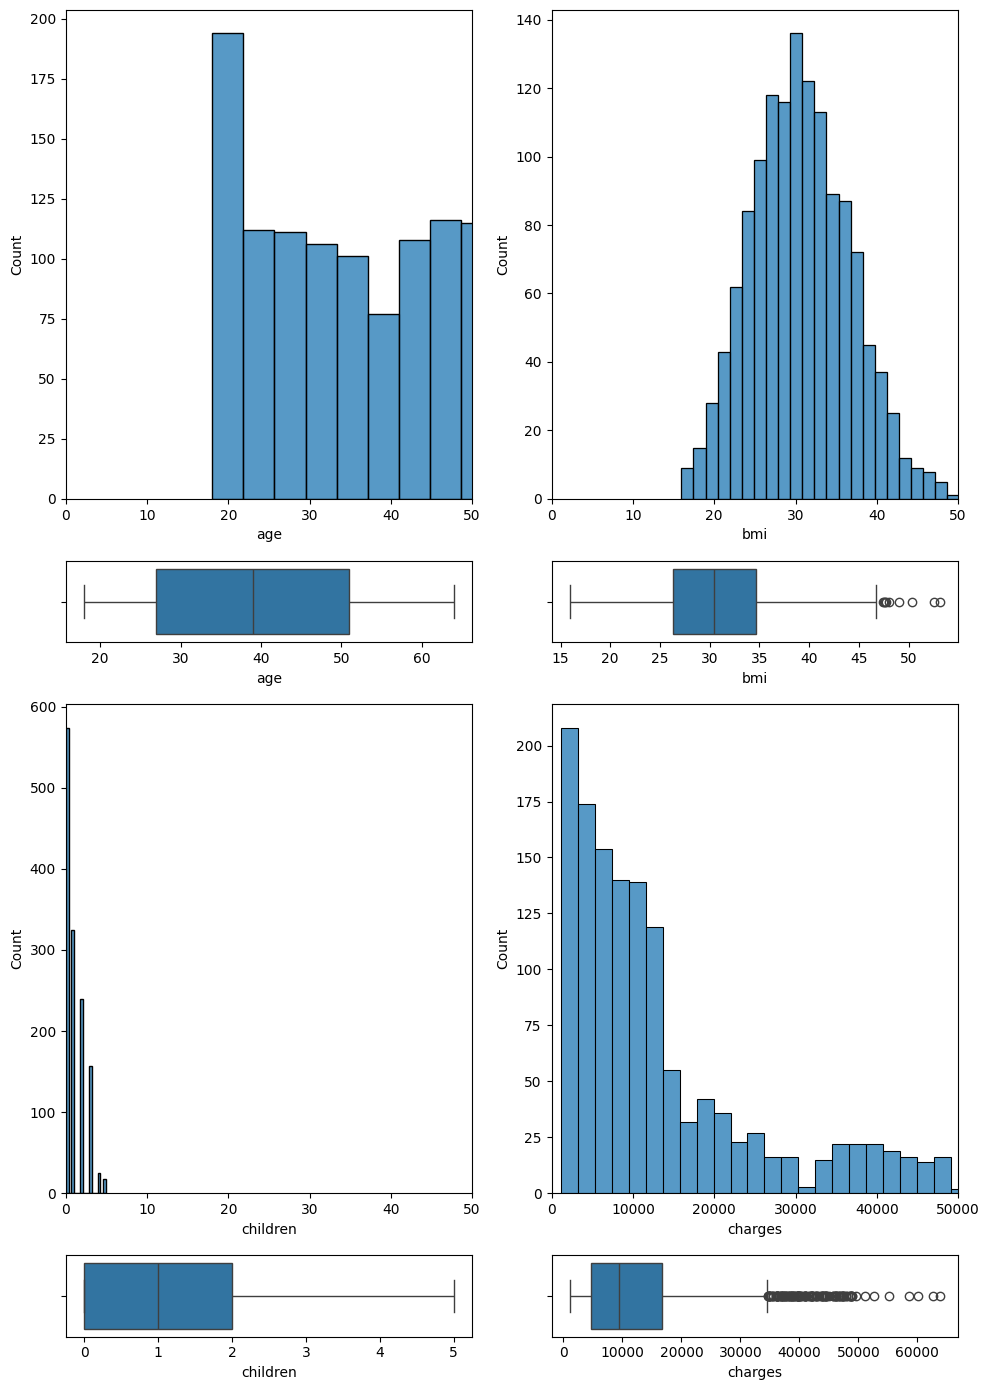

In [32]:
fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw={'height_ratios': [6, 1, 6, 1]})
sns.histplot(ax=axis[0, 0], data=df, x='age').set(xlim=(0, 50))
sns.boxplot(ax=axis[1, 0], data=df, x='age')
sns.histplot(ax=axis[0, 1], data=df, x='bmi').set(xlim=(0, 50))
sns.boxplot(ax=axis[1, 1], data=df, x='bmi')
sns.histplot(ax=axis[2, 0], data=df, x='children').set(xlim=(0, 50))
sns.boxplot(ax=axis[3, 0], data=df, x='children')
sns.histplot(ax=axis[2, 1], data=df, x='charges').set(xlim=(0, 50000))
sns.boxplot(ax=axis[3, 1], data=df, x='charges')

plt.tight_layout()
plt.show()

#Analisis Univariante

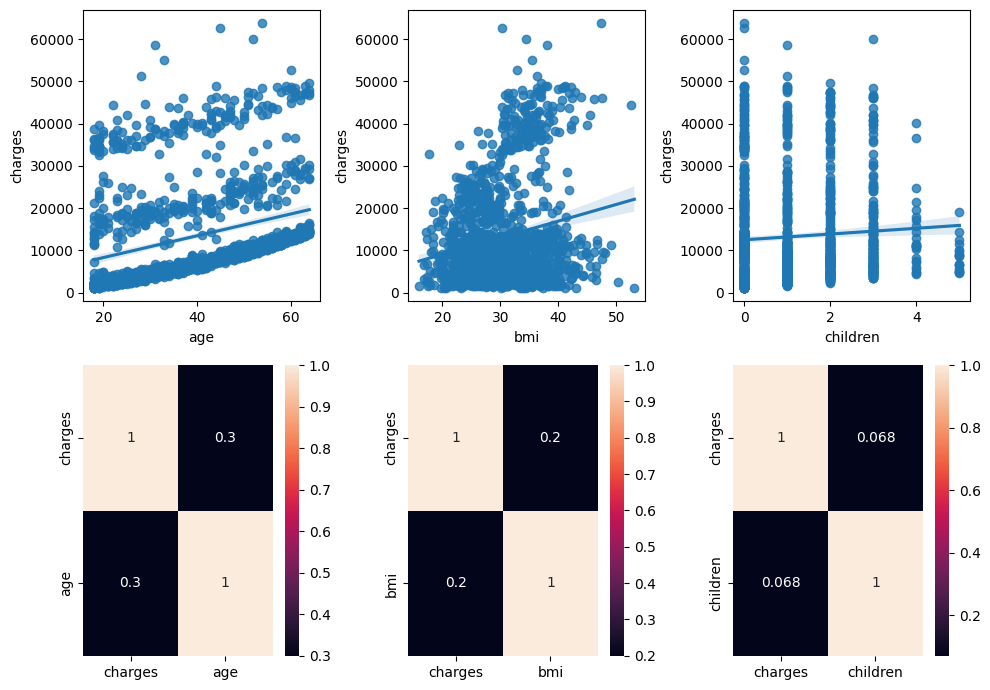

In [33]:
fig, axis= plt.subplots(2,3, figsize=(10,7))

sns.regplot(ax= axis[0,0], data=df, x='age', y='charges')
sns.heatmap(df[['charges','age']].corr(), ax=axis[1,0], annot=True)
sns.regplot(ax= axis[0,1], data=df, x='bmi', y='charges')
sns.heatmap(df[['charges','bmi']].corr(), ax=axis[1,1], annot=True)
sns.regplot(ax= axis[0,2], data=df, x='children', y='charges')
sns.heatmap(df[['charges','children']].corr(), ax=axis[1,2], annot=True)

plt.tight_layout()
plt.show()

#Analisis multivariable




In [34]:
#Esta variable no tiene correlación importante, la borraré.
df = df.drop(['children'], axis=1)

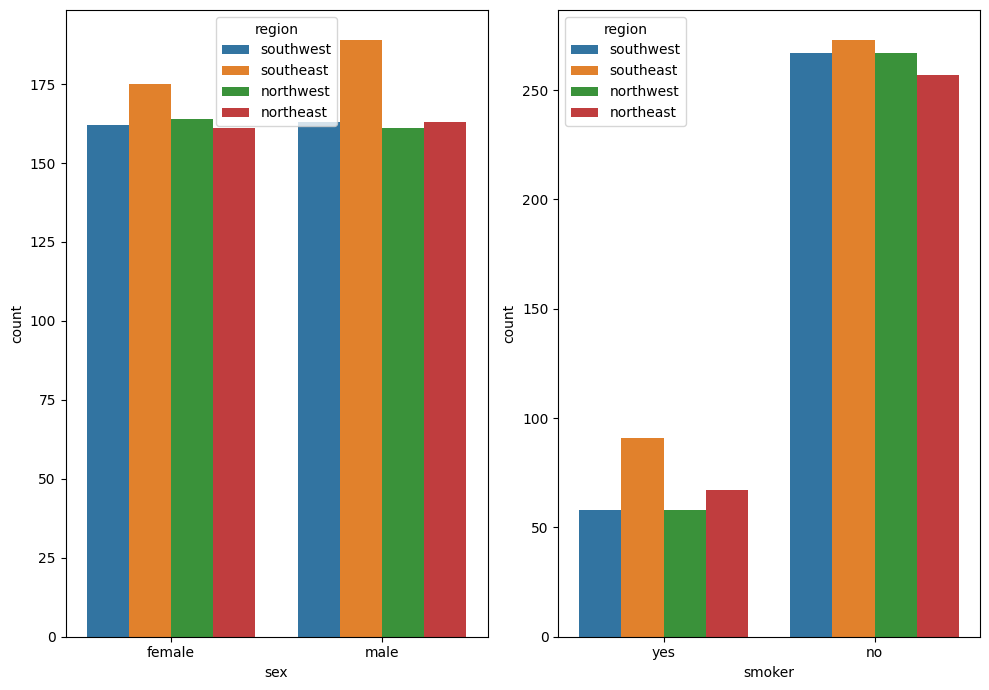

In [35]:
fig, axis= plt.subplots(1, 2, figsize=(10, 7))
sns.countplot(data=df, x='sex', hue='region', ax=axis[0])
sns.countplot(data=df, x='smoker', hue='region', ax=axis[1])

plt.tight_layout()
plt.show()

# Analisis categorico - categorico

In [36]:

df.to_csv('../data/raw/insurance.csv', index=False)

for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_n'] = pd.factorize(df[column])[0]

df.head()

# Datos limpios y Factorizacion

,age,sex,bmi,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,no,southeast,1725.55230,1,1,1
2,28,male,33.000,no,southeast,4449.46200,1,1,1
3,33,male,22.705,no,northwest,21984.47061,1,1,2
4,32,male,28.880,no,northwest,3866.85520,1,1,2


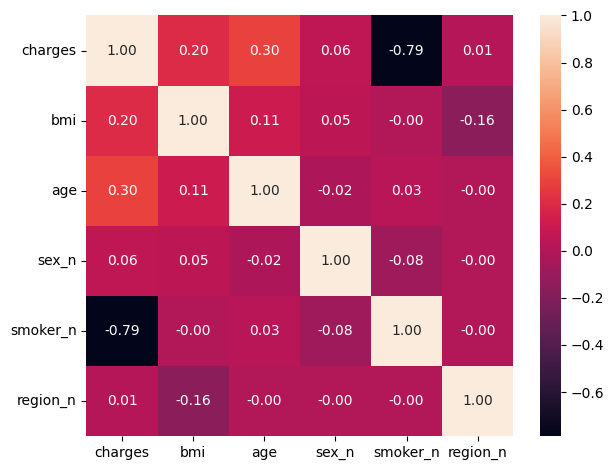

In [37]:
variables_numericas = []
for column in df.columns:
    if df[column].dtype != 'object':
        variables_numericas.append(column)
variables_numericas

sns.heatmap(df[['charges', 'bmi', 'age', 'sex_n', 'smoker_n', 'region_n']].corr(), annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

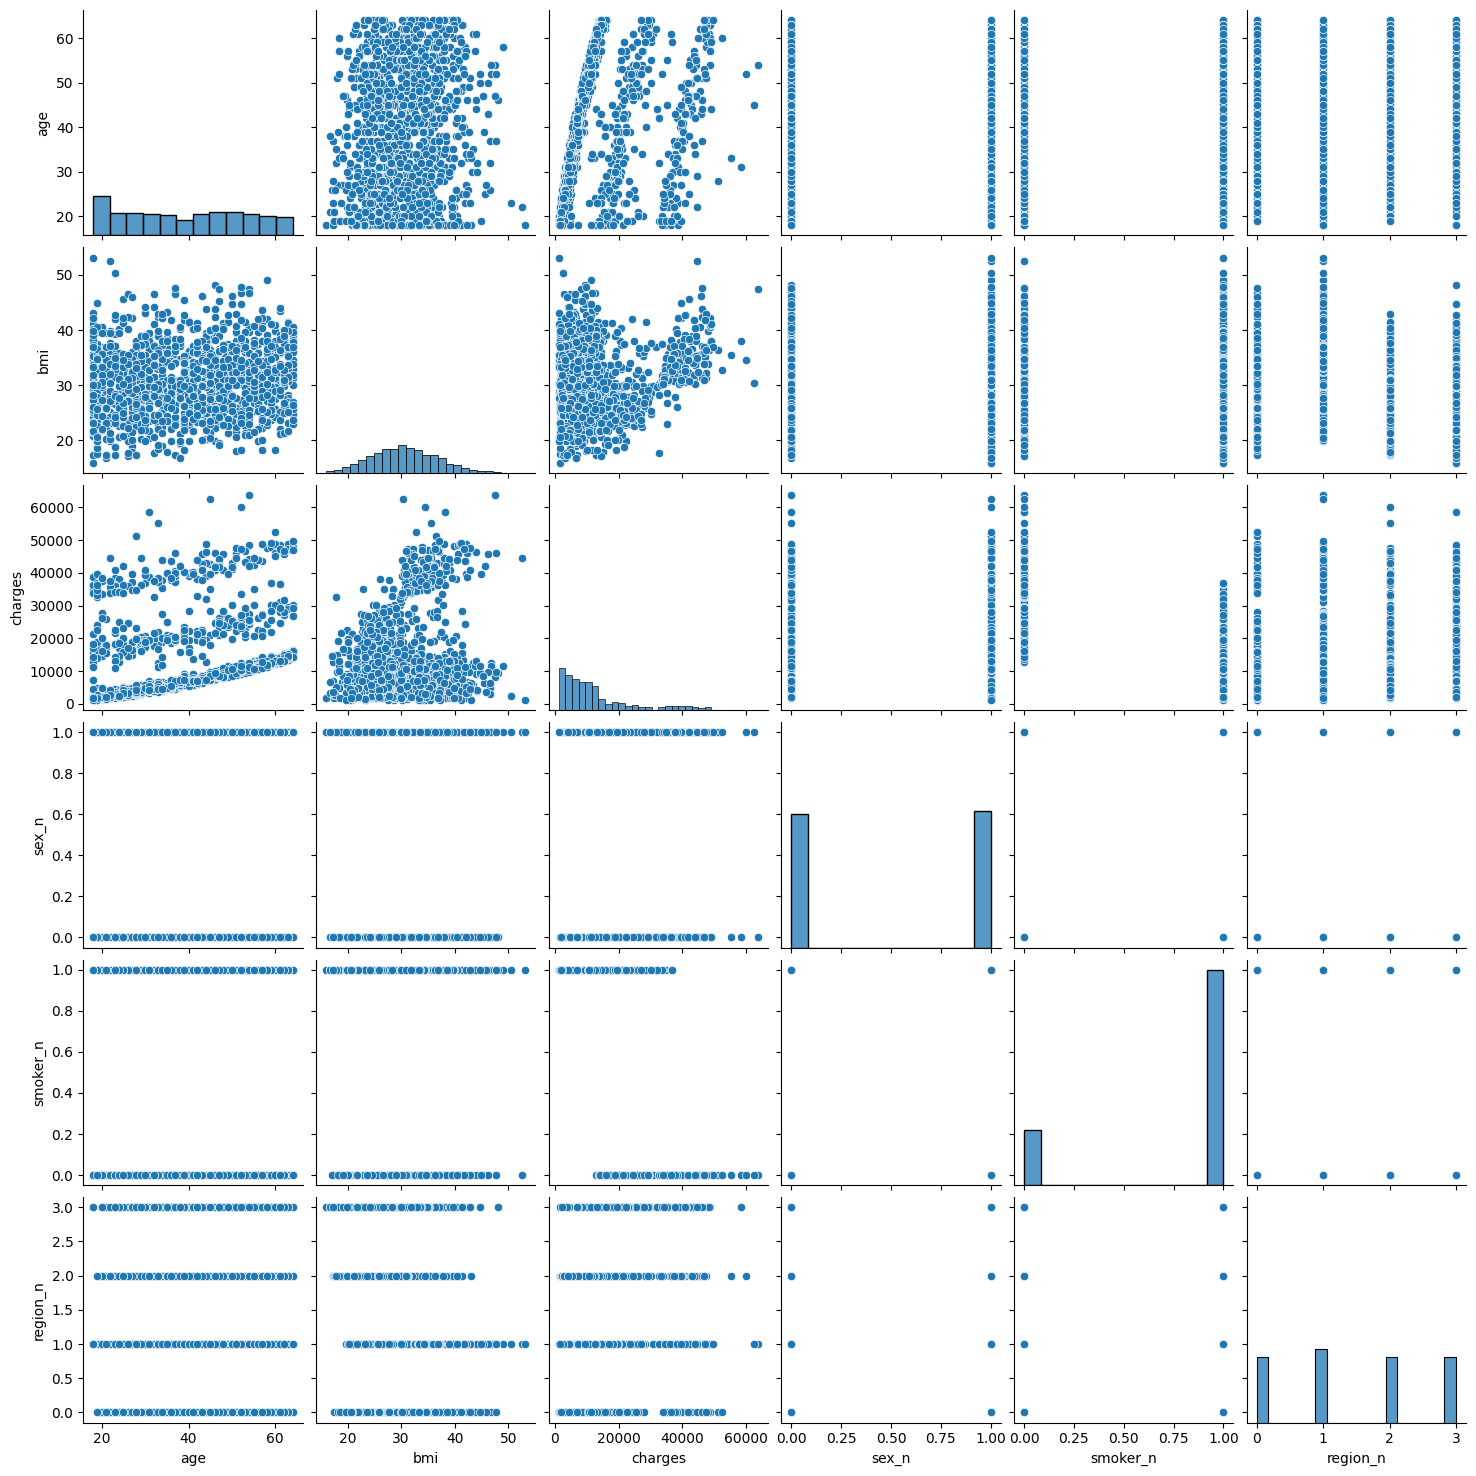

In [38]:
sns.pairplot(data=df)

plt.show()

In [39]:
df.describe()

,age,bmi,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,63770.428010,1.000000,1.000000,3.000000


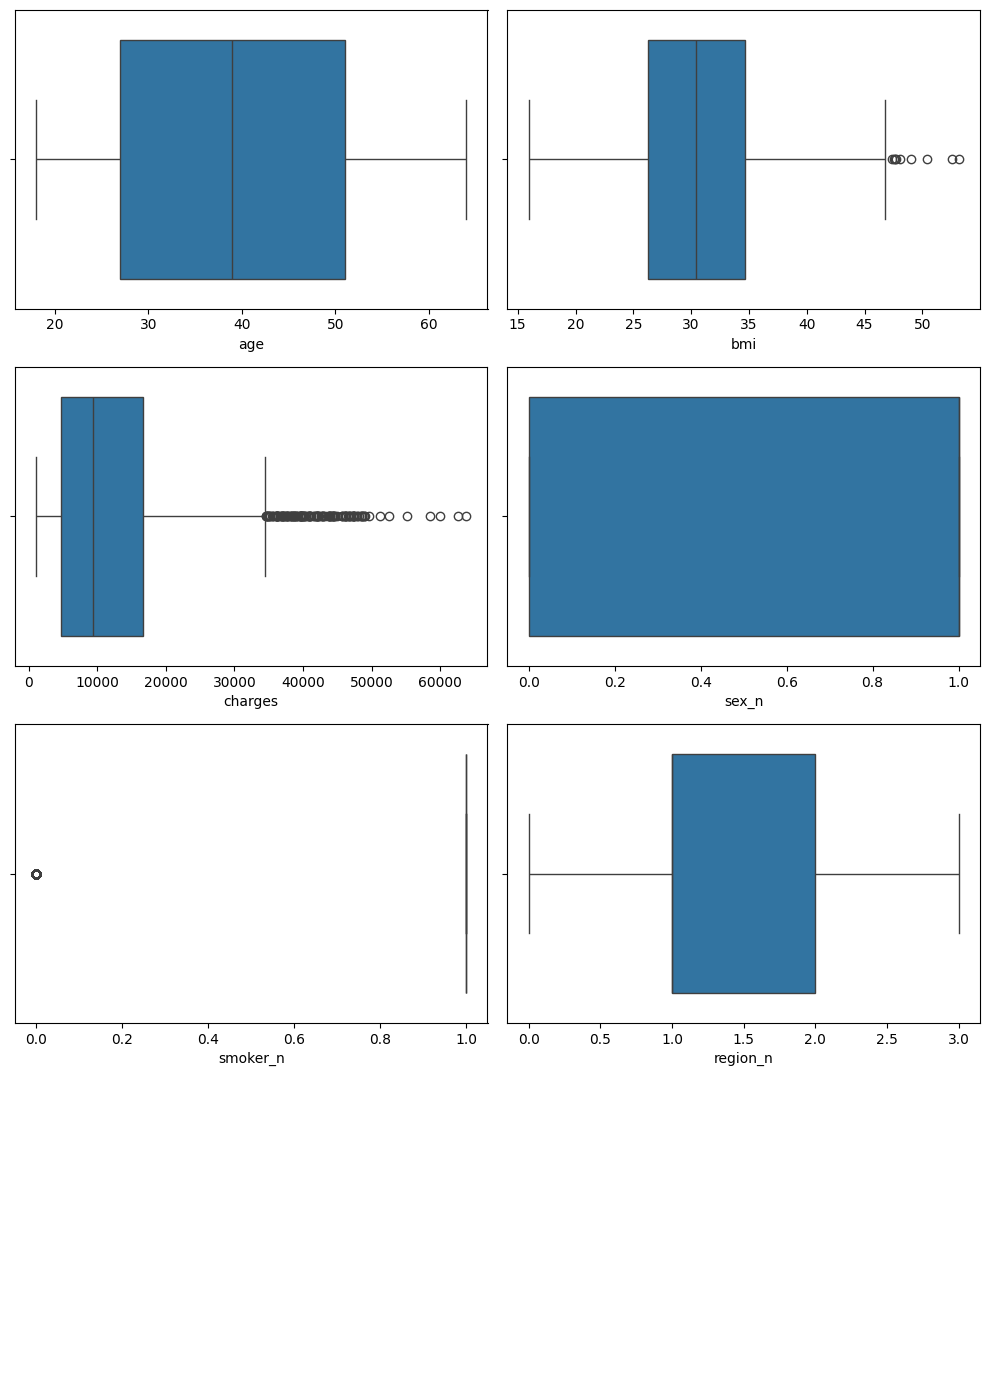

In [40]:
listado_boxplots = variables_numericas
fig, axis = plt.subplots(4, 2, figsize=(10, 14))

contador = 0
for i in range(4):
    for j in range(2):
        if contador < len(listado_boxplots):
            sns.boxplot(ax=axis[i, j], data=df, x=listado_boxplots[contador])
            contador += 1
        else:
            axis[i, j].axis('off')  # Turn off the axis if no more plots
plt.tight_layout()
plt.show()

In [41]:
stats_charges = df['charges'].describe()
stats_bmi = df['bmi'].describe()

def limites_superior_inferior(stats_df):
    iqr= stats_df["75%"] - stats_df["25%"]
    upper_limit = stats_df["75%"] + 1.5 * iqr
    lower_limit = stats_df["25%"] - 1.5 * iqr
    return round(upper_limit), round(lower_limit)

limites_superior_inferior(stats_charges)
print(f'los límites de charges son {limites_superior_inferior(stats_charges)}')
limites_superior_inferior(stats_bmi)
print(f'los límites de bmi son {limites_superior_inferior(stats_bmi)}')

#Quitar variables atipicas

los límites de charges son (34489, -13109)
los límites de bmi son (47, 14)


In [42]:
df = df[(df['charges'] >= 0) & (df['charges'] <= 34489)]
df = df[(df['bmi'] >= 0) & (df['bmi'] <= 47)]
df.shape
df.isnull().sum()

# No hay negativos 

age         0
sex         0
bmi         0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

features_escaladas=Scaler.fit_transform(df[variables_numericas])#Esto me transforma los datos en matriz, el scaler.
#Por ello debo volver a transformar todo en un dataframe.
df_escalado = pd.DataFrame(features_escaladas, columns=variables_numericas)
df_escalado.head()

#Escalar

,age,bmi,charges,sex_n,smoker_n,region_n
0,-1.421407,-0.357841,0.957834,-0.975980,-2.764946,-1.356873
1,-1.492543,0.643111,-1.133608,1.024611,0.361671,-0.456066
2,-0.781184,0.511811,-0.757808,1.024611,0.361671,-0.456066
3,-0.425504,-1.243693,1.661386,1.024611,0.361671,0.444740
4,-0.496640,-0.190732,-0.838186,1.024611,0.361671,0.444740


In [44]:
from sklearn.model_selection import train_test_split

X = df_escalado.drop(['charges'], axis=1)

Y = df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.head()

# Hice split, y columna que estoy prediciendo

,age,bmi,sex_n,smoker_n,region_n
63,0.356992,-0.443101,1.024611,0.361671,-1.356873
141,1.068351,1.637243,1.024611,0.361671,-1.356873
538,1.779711,1.543457,-0.975980,0.361671,-0.456066
371,0.641535,0.034355,1.024611,0.361671,-1.356873
358,-0.069824,-1.513967,1.024611,0.361671,-0.456066


In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)



LinearRegression()

In [46]:
print(model.intercept_)
print(model.coef_)

9997.112700140611
[ 3434.45114769   427.36613612  -359.58468305 -4966.99668777
   649.01410669]


In [47]:
y_pred = model.predict(X_test)
y_pred

array([ 8256.86941624,  5309.99209249,  1975.24720389,  5942.29217464,
        3642.25242865,  9191.96491714, 13000.48000555, 12557.58527025,
        3157.27586414, 24965.81122886,  4886.3363795 , 24859.95976544,
       19879.22558417, 12006.65475591,  5078.36319444,  5305.36345094,
        3412.44223636, 23467.50728852,  5190.58928802, 21149.90117297,
       10759.03336182,  5926.15158696, 11251.66304792,  1958.59680949,
        3297.19110688, 10257.21725361,  4056.11188167,  4313.91042879,
        7521.49311013, 11660.31748044,  7957.28385167,  5415.04902552,
       12120.25547115,  5291.52299233, 11499.17759885,  7890.78900594,
        6418.7825105 ,  4526.59195982, 19967.86935627, 15168.79592568,
        9495.01588939,  3564.64487357, 14789.11922188,  1811.27898605,
        3845.31669805, 12957.04312971,  7028.49342024, 14224.33939826,
       11794.58114371,  3141.60531137, 26639.09235293,  6164.92311829,
       25793.74952377, 19944.62855001,  9484.7476755 , 11630.43262723,
      

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print (f'R2: {r2_score(y_test,y_pred)}')

MSE: 19212468.974261448
R2: 0.5981735471227729


In [49]:
X_train = X_train[['age','bmi','smoker_n']]
X_test = X_test [['age','bmi','smoker_n']]

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print (f'R2: {r2_score(y_test,y_pred)}')

MSE: 18171103.807426568
R2: 0.6199535729851308


In [50]:
from pickle import dump

dump(model,open('../models/linear_regression_default.sav','wb'))